In [39]:
import re 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os

In [40]:
def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data

file = 'text_emotion_dataset.txt'
data = read_data(file)
print("Number of instances: {}".format(len(data)))

Number of instances: 7480


In [55]:
data.head()

AttributeError: 'list' object has no attribute 'head'

In [42]:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)

def text_process(mess):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc) #Removing punctuation
    result = ""
    stop = ""
    stem = ""
    lemm = ""
    
    print("Tokenization:\n {}".format(nopunc.split()))
    for word in nopunc.split(): #Tokenization
        if word.lower() not in stopwords.words('english'):#Removing Stopwords
            stop += ' '+word      
            ps.stem(word) #Stemming
            stem += ' '+word
            lemmatizer.lemmatize(word, pos ="a") #Lemmetization
            lemm += ' '+word
            result += ' '
            result += word  
    print("\nAfter removing Stopwords:\n{}".format(stop))
    print("\nAfter Stemming:\n{}".format(stem))
    print("\nAfter Lemmatization:\n{}".format(lemm))
    return result

In [43]:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc, pred

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train

<5984x249535 sparse matrix of type '<class 'numpy.float64'>'
	with 488985 stored elements in Compressed Sparse Row format>

In [21]:
import warnings
warnings.filterwarnings('ignore')

CLASSIFIER: SVC

Classification Report :
              precision    recall  f1-score   support

       anger       0.25      0.45      0.32       130
     disgust       0.57      0.38      0.46       288
        fear       0.52      0.58      0.55       200
       guilt       0.42      0.42      0.42       217
         joy       0.63      0.52      0.57       253
     sadness       0.50      0.48      0.49       233
       shame       0.28      0.32      0.30       175

    accuracy                           0.45      1496
   macro avg       0.45      0.45      0.44      1496
weighted avg       0.48      0.45      0.46      1496

Confusion Matrix :
[[ 58  15   7  16   8   8  18]
 [ 44 110  44  13  25  20  32]
 [ 18  12 116  16   8  15  15]
 [ 27  14  16  91   8  24  37]
 [ 18  13  15  24 132  25  26]
 [ 32  16  17  18  23 112  15]
 [ 31  13   9  40   7  19  56]]

Accuracy : 0.45120320855614976


CLASSIFIER: LinearSVC

Classification Report :
              precision    recall  f1-score 

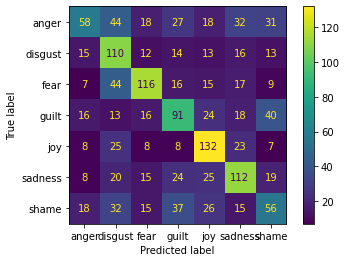

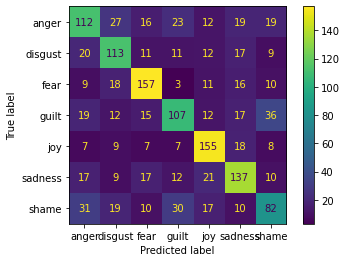

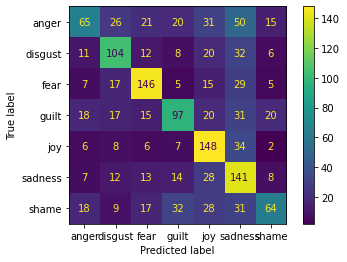

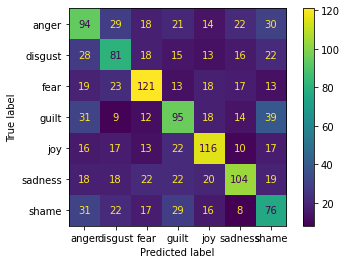

In [57]:
# Classifiers
svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(n_estimators = 100,
                                 max_features = 80,
                                 criterion = 'gini',
                                 random_state = 123)
dtree = DecisionTreeClassifier(criterion='gini')

clifs = [svc, lsvc, rforest, dtree]

#print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
#print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))

# Training and Testing 
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc, pred = train_test(clf, X_train, X_test, y_train, y_test)
    
    #print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))
    
    # Performance Metrics
    print("CLASSIFIER: {}\n".format(clf_name))
    print("Classification Report :\n{}".format(classification_report(pred, y_test)))
    print("Confusion Matrix :") 
    print(confusion_matrix(pred, y_test))
    print("\nAccuracy : {}\n\n".format(accuracy_score(pred, y_test)))
    plot_confusion_matrix(clf,X_test,y_test)

Classification Report :
              precision    recall  f1-score   support

       anger       0.48      0.51      0.50       216
     disgust       0.62      0.50      0.56       238
        fear       0.67      0.65      0.66       232
       guilt       0.52      0.56      0.54       204
         joy       0.71      0.62      0.66       239
     sadness       0.56      0.52      0.54       240
       shame       0.33      0.51      0.40       127

    accuracy                           0.56      1496
   macro avg       0.56      0.55      0.55      1496
weighted avg       0.57      0.56      0.56      1496

Confusion Matrix :
[[110  19   7  23  12  13  32]
 [ 24 120  29  16  16  16  17]
 [ 16  12 150  16   6  17  15]
 [ 17   6   6 114   8  19  34]
 [ 12  12  10  13 149  22  21]
 [ 31  20  18  13  19 124  15]
 [ 18   4   4  23   1  12  65]]

Accuracy : 0.5561497326203209


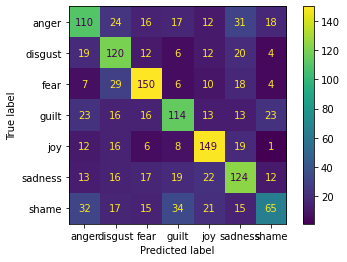

In [58]:
eclf = VotingClassifier(estimators=[('sv', svc), 
                                     ('ls', lsvc), 
                                     ('rf', rforest),
                                     ('dt', dtree)], 
                                     voting='hard')
eclf = eclf.fit(X_train, y_train)
pred = eclf.predict(X_test)


print("Classification Report :\n{}".format(classification_report(pred, y_test)))
print("Confusion Matrix :") 
print(confusion_matrix(pred, y_test))
print("\nAccuracy : {}".format(accuracy_score(pred, y_test)))
plot_confusion_matrix(eclf,X_test,y_test)

In [59]:
l = ["joy", "fear", "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
label_freq = {}
for label, _ in data: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

joy       (1. 0. 0. 0. 0. 0. 0.)  1084
anger     (0. 0. 1. 0. 0. 0. 0.)  1080
sadness   (0. 0. 0. 1. 0. 0. 0.)  1079
fear      (0. 1. 0. 0. 0. 0. 0.)  1078
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
emoji_dict = {"joy":"😃", "fear":"😱", "anger":"😡", "sadness":"😢", "disgust":"🤢", "shame":"😳", "guilt":"🙃"}

In [11]:
t1 = "This looks so impressive"
t2 = "I have a fear of dogs"
t3 = "My dog died yesterday"
t4 = "I was glad the movie had a happy ending"
t5 = "I am always angry"
t6 = "This isn't funny don't fool around"
t7 = "I saw all the drunk kids"

texts = [t1, t2, t3, t4, t5, t6, t7]
for text in texts: 
    text = text_process(text)
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = clf.predict(features)[0]
    print( text,emoji_dict[prediction])

 looks impressive 🙃
 fear dogs 😱
 dog died yesterday 😢
 glad movie happy ending 😃
 always angry 😡
 isnt funny dont fool around 🙃
 saw drunk kids 🤢


In [72]:
directory = 'Music_Database'
song_no = len([item for item in os.listdir(directory) if os.path.isfile(os.path.join(directory, item))])

#Getting Song lyrics to create database
print("Enter song title:")
title = input()
print("\nEnter song lyric:")
lyric = input()
with open('Music_Database/song_{}.txt'.format(song_no+1), mode='x+') as f:
    f.write(lyric)
    
print('\nSong Added to Music Database!\n')



#Lyric Classification
text = ""
with open('Music_Database/song_{}.txt'.format(song_no+1), mode='r') as f:
    for line in f:
        line = line.strip()
        text += ' '+line
text = text_process(text)
features = create_feature(text, nrange=(1, 4))
features = vectorizer.transform(features)
prediction = clf.predict(features)[0]

print('\nPre-processed lyric:\n' + text + '\n')
print('Predicted Emotion: ' + emoji_dict[prediction] + prediction)



#Adding the classification to the Log file to create playlist
with open('lyric_classification_log.txt', mode='a') as f:
    f.write('song_{}.txt - {} - {}\n'.format(song_no+1, prediction, title))
    
print('\nSong Added to Lyric Classification Log!')
print('song_{}.txt - {} - {}\n'.format(song_no+1, prediction, title))

Enter song title:
Hello

Enter song lyric:
Couldn't relax, couldn't sit back And let the sunlight in my lap I sang a hymn to bring me peace And then it came, a melody  It felt so sweet, it felt so strong It made me feel like I belonged And all the sadness inside me Melted away like I was free  I found what I'd been looking for in myself Found a life worth living for someone else Never thought that I could be, I could be Happy, happy  Don't go out much at all I've never been the type to call I realize to be happy Maybe I need a little company

Song Added to Music Database!

Tokenization:
 ['Couldnt', 'relax', 'couldnt', 'sit', 'back', 'And', 'let', 'the', 'sunlight', 'in', 'my', 'lap', 'I', 'sang', 'a', 'hymn', 'to', 'bring', 'me', 'peace', 'And', 'then', 'it', 'came', 'a', 'melody', 'It', 'felt', 'so', 'sweet', 'it', 'felt', 'so', 'strong', 'It', 'made', 'me', 'feel', 'like', 'I', 'belonged', 'And', 'all', 'the', 'sadness', 'inside', 'me', 'Melted', 'away', 'like', 'I', 'was', 'free', 